In [506]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from matplotlib.offsetbox import AnchoredText
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display

In [507]:
df = pd.read_csv("China_WWTP_Data.csv")
df
df = df.set_index('DATE')
#df = df.dropna()
df_corr = df.corr()
df_corr_abs = df.corr().abs()
upper = df_corr_abs.where(np.triu(np.ones(df_corr_abs.shape), k=1).astype(np.bool))
df_corr.to_csv(r'correlation.csv')

In [508]:
#Saving columns and rows
columns = list(df_corr.columns)
rows = list(df_corr.index.values)

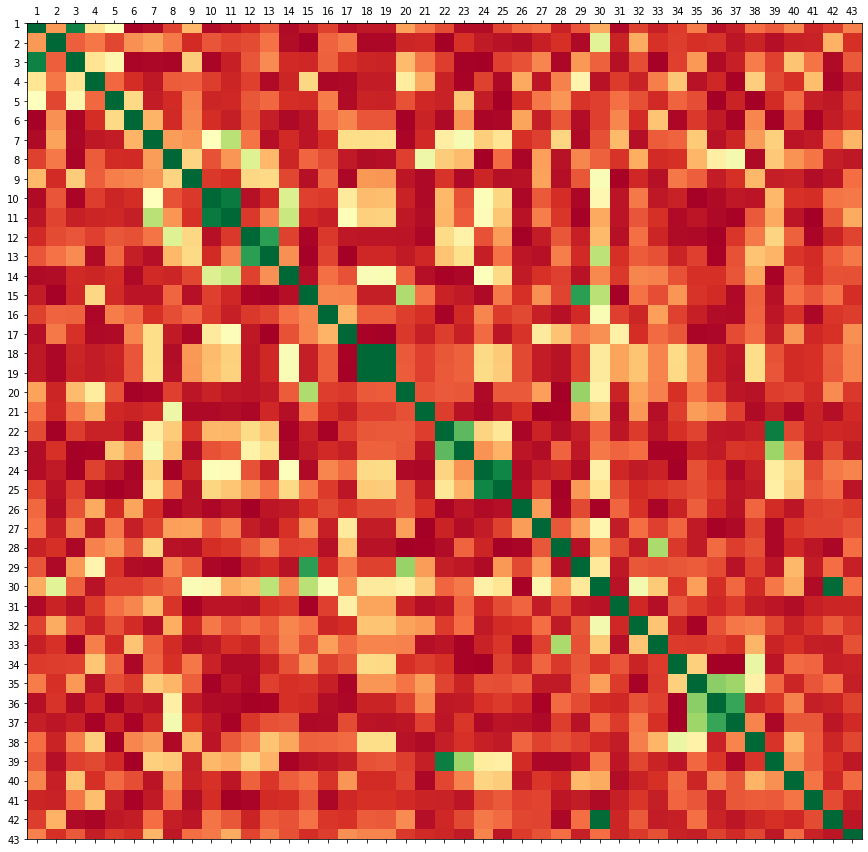

              1        2          3        4           5
Name  BT_C_TEMP  BT_C_DO  BT_N_TEMP  BO_N_DO  Clari_Temp
-----------------------------------------------------------------------------------------------------
             6              7         8           9         10
Name  Clari_DO  Pre-st2_Condu  EQ_Condu  Pre-st2_SS  BT_C_MLSS
-----------------------------------------------------------------------------------------------------
              11         12          13    14           15
Name  BT_C_MVLSS  BT_N_MLSS  BT_N_MVLSS  D_SS  Pre-St2_COD
-----------------------------------------------------------------------------------------------------
          16        17        18            19              20
Name  EQ_COD  BT_N_COD  D_COD_ON  D_TOC_ON_AVG  Pre-St2_ETU_AM
-----------------------------------------------------------------------------------------------------
                  21          22          23         24         25
Name  Pre-St2_ETU_PM  OxT_ETU_AM  OxT_ETU

In [509]:
labels = [l for l in np.arange(1,len(columns)+1)]
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
ax.matshow(df_corr_abs, cmap=plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

dicc = pd.read_csv("Dictionary.csv")
plt.show()
dicc = dicc
dicc = dicc.rename(index = {0: 'Name'})
a = np.arange(0,43)
li = 0
ls = 5
for i in np.arange(1,10):
    print(dicc.iloc[:,a[li:ls]])
    print('-----------------------------------------------------------------------------------------------------')
    li = li + 5
    ls = ls + 5

In [510]:
corrv=list()
th = 0.9
corr = upper.values
sz = len(corr)
for i in np.arange(0,sz):
    for j in np.arange(0,sz):        
        if corr[i,j] > th and corr[i,j] < 1:
            corrv.append([i,j])

In [511]:
sz = len(corrv)
values = df_corr.values
corrname = list()
print('Las variables con una correlación mayor a abs(±{}) son:'.format(th))
for i in np.arange(0, sz):
    print('    {} y {} con correlación {} '.format(rows[corrv[i][0]], columns[corrv[i][1]], round(values[corrv[i][0],corrv[i][1]], 4)))
    corrname.append([rows[corrv[i][0]], columns[corrv[i][1]]])
    

Las variables con una correlación mayor a abs(±0.9) son:
    BT_C_TEMP y BT_N_TEMP con correlación 0.9418 
    BT_C_MLSS y BT_C_MVLSS con correlación 0.9589 
    D_COD_ON y D_TOC_ON_AVG con correlación 0.9999 
    OxT_ETU_AM y OxT_PH_AM con correlación 0.9497 
    EQ_ETU_AM y EQ_ETU_PM con correlación 0.9353 
    SWWPAC_TOC y BT_N_PH con correlación -0.991 


In [513]:
boxes = len(corrname)

def changesize(a,b):
    fig = plt.figure(figsize = [a,b])
    b2 = 2
    b1 = boxes/b2
    b1 = int(math.ceil(b1))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for i in range(1, boxes + 1):
        data = pd.DataFrame(df,columns = corrname[i-1])
        ax = fig.add_subplot(b1, b2, i)
        ax.plot(data.iloc[:,0],data.iloc[:,1],'o')
        tx = str(round(values[corrv[i-1][0],corrv[i-1][1]], 4))
        tx = 'r = ' + tx
        anchored_text = AnchoredText(tx, loc=1)
        ax.add_artist(anchored_text)
        ax.set_xlabel(corrname[i-1][0])
        ax.set_ylabel(corrname[i-1][1])

a = widgets.IntSlider(min=1, max=30, value=15, description='width')
b = widgets.IntSlider(min=1, max=30, value=20, description='height')
    
widgets.interactive(changesize, a=a, b=b)


interactive(children=(IntSlider(value=15, description='width', max=30, min=1), IntSlider(value=20, description…